<a href="https://colab.research.google.com/github/eyalbd2/097215_Natural-Language-Processing_Workshop-Notebooks/blob/master/NLP_2_pytorch_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> IE 097215 - Technion - Natural Language Processing

## Pytorch basics



### Part 1 - Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [3]:
import torch

Initializing a tensor, with what is in memory at the moment.

In [4]:
x = torch.empty(4, 4)
print(x)

tensor([[9.9184e-39, 8.7245e-39, 9.2755e-39, 8.9082e-39],
        [9.9184e-39, 8.4490e-39, 9.6429e-39, 1.0653e-38],
        [1.0469e-38, 4.2246e-39, 1.0378e-38, 9.6429e-39],
        [9.2755e-39, 9.7346e-39, 1.0745e-38, 1.0102e-38]])


And now lets initialize it randomly

In [5]:
x = torch.rand(4, 4)
print(x)

tensor([[0.8578, 0.1974, 0.6156, 0.5878],
        [0.1106, 0.1154, 0.2687, 0.9946],
        [0.6482, 0.3879, 0.4437, 0.7615],
        [0.1724, 0.8677, 0.4323, 0.5561]])


Zeros tensor

In [6]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct directly:

In [7]:
x = torch.tensor([12.25, 2])
print(x)

tensor([12.2500,  2.0000])


We can create a tensor based on an existing tensor, and get its size. 

In [8]:
x = x.new_ones(4, 4, dtype=torch.double)  # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)  # override dtype!
print(x)
x.size()

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.0745, -0.5834,  1.0798,  0.2510],
        [-0.0638, -0.1808,  1.2944, -1.1183],
        [-0.9714, -0.9735,  1.8739, -0.3301],
        [ 1.6287,  1.4087,  1.4508,  1.7451]])


torch.Size([4, 4])

Lets watch some tensor oprations:

In [9]:
# Addition
y = torch.rand(4, 4)
print("x+y = ")
print(x + y)

# Another addition
print("x+y = ")
print(torch.add(x, y))

# Addition in-place (changing y)
y.add_(x)
print("y = ")
print(y)

x+y = 
tensor([[ 1.2888e+00, -8.3738e-02,  1.6950e+00,  3.3198e-01],
        [ 7.7939e-01,  6.1256e-01,  2.0807e+00, -4.2936e-01],
        [ 1.8372e-03, -9.5986e-01,  1.9557e+00, -4.6675e-02],
        [ 1.7563e+00,  1.6498e+00,  1.7506e+00,  2.4390e+00]])
x+y = 
tensor([[ 1.2888e+00, -8.3738e-02,  1.6950e+00,  3.3198e-01],
        [ 7.7939e-01,  6.1256e-01,  2.0807e+00, -4.2936e-01],
        [ 1.8372e-03, -9.5986e-01,  1.9557e+00, -4.6675e-02],
        [ 1.7563e+00,  1.6498e+00,  1.7506e+00,  2.4390e+00]])
y = 
tensor([[ 1.2888e+00, -8.3738e-02,  1.6950e+00,  3.3198e-01],
        [ 7.7939e-01,  6.1256e-01,  2.0807e+00, -4.2936e-01],
        [ 1.8372e-03, -9.5986e-01,  1.9557e+00, -4.6675e-02],
        [ 1.7563e+00,  1.6498e+00,  1.7506e+00,  2.4390e+00]])


In [10]:
# Numpy operations on Tensors
print(f"x=\n{x}")
print(f"x[0, :]={x[0, :]}")
print(f"x[:, 0]={x[:, 0]}")

x=
tensor([[ 1.0745, -0.5834,  1.0798,  0.2510],
        [-0.0638, -0.1808,  1.2944, -1.1183],
        [-0.9714, -0.9735,  1.8739, -0.3301],
        [ 1.6287,  1.4087,  1.4508,  1.7451]])
x[0, :]=tensor([ 1.0745, -0.5834,  1.0798,  0.2510])
x[:, 0]=tensor([ 1.0745, -0.0638, -0.9714,  1.6287])


Resizing and reshaping a tensor

In [15]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, int(x.size(0) * 2))  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [16]:
x.shape

torch.Size([4, 4])

In [17]:
x[0][0] = 5
print(x)
print(z)

tensor([[ 5.0000, -0.0677, -0.4911, -0.9584],
        [ 0.1893, -0.0050, -0.0813,  1.2404],
        [ 0.6402, -0.7214,  0.7273,  0.0557],
        [-0.6376, -0.5504,  0.2368,  0.0669]])
tensor([[ 5.0000, -0.0677, -0.4911, -0.9584,  0.1893, -0.0050, -0.0813,  1.2404],
        [ 0.6402, -0.7214,  0.7273,  0.0557, -0.6376, -0.5504,  0.2368,  0.0669]])


Convert a tensor to a numpy array

In [18]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [19]:
# See how the numpy array changed in value.
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Convert Numpy array to tensor

In [20]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### Cuda Tensors
Using the .to method, Tensors can be moved onto any device.

In [21]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")  # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)  # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))  # ``.to`` can also change dtype together!

tensor([[6.0000, 0.9323, 0.5089, 0.0416],
        [1.1893, 0.9950, 0.9187, 2.2404],
        [1.6402, 0.2786, 1.7273, 1.0557],
        [0.3624, 0.4496, 1.2368, 1.0669]], device='cuda:0')
tensor([[6.0000, 0.9323, 0.5089, 0.0416],
        [1.1893, 0.9950, 0.9187, 2.2404],
        [1.6402, 0.2786, 1.7273, 1.0557],
        [0.3624, 0.4496, 1.2368, 1.0669]], dtype=torch.float64)


In [22]:
# We could also move tensor to the available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [23]:
torch.cuda.is_available()

True

In [24]:
! nvidia-smi

Tue Jun 21 14:35:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P1000       WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8    N/A /  N/A |    335MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

See PyTorch Tensors [Tutorial](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html) and [Documentation](https://pytorch.org/docs/stable/tensors.html) for more info and examples.

### Part 2 - Define a DNN model
We would like to demonstrate how to construct a simple regression model with pytorch. We devide this demonstration to 4 steps:


1.   Creating our neural-net model
2.   Data Creation and split to train, val, test
3.   Optimizer and Loss
4.   Training

Lets begin.. :)




#### Step 1 - Creating our neural-net model

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


# We create a FC regression network, with 2 layers.
class RegressioNet(nn.Module):
    def __init__(self):
        super(RegressioNet, self).__init__()
        self.hidden_dim = 10
        self.layer_1 = torch.nn.Linear(1, self.hidden_dim)
        self.layer_2 = torch.nn.Linear(self.hidden_dim, 1)
        self.activation = F.relu

    def forward(self, x):
        x = self.layer_1(x)  # x.size() -> [batch_size, self.hidden_dim]
        x = self.activation(x)  # x.size() -> [batch_size, self.hidden_dim]
        x = self.layer_2(x)  # x.size() -> [batch_size, 1]
        return x


net = RegressioNet()
print(net)

RegressioNet(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


###### Activation Function
We are building a regression model, hence we don't need an activation function. However, an example of a ReLU implementation is given by [`F.relu`](https://pytorch.org/docs/stable/nn.functional.html#relu). 
Recall the ReLU formulation:
$ReLU(x) = max(0,x)$

#### Step 2 - Data Creation and split to train, val, test


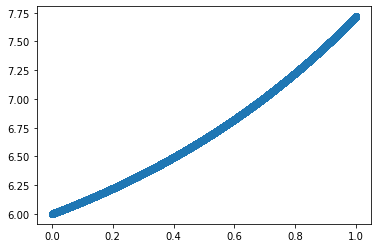

In [26]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100000)

# y = exp(x) + 5 + noise
y = np.exp(x) + np.random.rand(100000) * 0.001 + 5

plt.scatter(x, y)
plt.show()

In [27]:
split_frac = 0.8

## split data into training, validation, and test data (x and y)

split_idx = int(len(x) * split_frac)
train_x, remaining_x = x[:split_idx], x[split_idx:]
train_y, remaining_y = y[:split_idx], y[split_idx:]

test_idx = int(len(remaining_x) * 0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

# print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print(
    "Train set: \t\t{}".format(train_x.shape),
    "\nValidation set: \t{}".format(val_x.shape),
    "\nTest set: \t\t{}".format(test_x.shape),
)

			Feature Shapes:
Train set: 		(80000,) 
Validation set: 	(10000,) 
Test set: 		(10000,)


#### Step 3 - Optimizer and Loss
Next, we should define the Optimizer and the Loss Function for our training process. We will use SGD as an optimizer,although many others are available (such as Adam, RMSprop, Adagrad..). Our Loss function will be is the MSE as we are constructiong a regression model (if we would build a classification model we would use Cross-Entropy).

In [28]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

#### Step 4 - Training

In [29]:
batch_size = 20

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x).float(), torch.from_numpy(train_y).float())
valid_data = TensorDataset(torch.from_numpy(val_x).float(), torch.from_numpy(val_y).float())
test_data = TensorDataset(torch.from_numpy(test_x).float(), torch.from_numpy(test_y).float())

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [30]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print("Sample input size: ", sample_x.size())  # batch_size
print("Sample input: \n", sample_x)
print()
print("Sample label size: ", sample_y.size())  # batch_size
print("Sample label: \n", sample_y)

Sample input size:  torch.Size([20])
Sample input: 
 tensor([0.6688, 0.2801, 0.5896, 0.4966, 0.4583, 0.8331, 0.3915, 0.5838, 0.6566,
        0.5960, 0.4780, 0.8313, 0.7098, 0.8810, 0.1720, 0.8319, 0.1332, 0.7666,
        0.5784, 0.8476])

Sample label size:  torch.Size([20])
Sample label: 
 tensor([6.9519, 6.3240, 6.8034, 6.6436, 6.5823, 7.3014, 6.4794, 6.7938, 6.9290,
        6.8150, 6.6135, 7.2962, 7.0343, 7.4142, 6.1879, 7.2979, 6.1425, 7.1535,
        6.7834, 7.3344])


In [31]:
# First checking if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    print("Training on GPU.")
else:
    print("No GPU available, training on CPU.")

Training on GPU.


In [32]:
# Define training params
epochs = 1

counter = 0
print_every = 100
clip = 1000  # gradient clipping

# move model to GPU, if available
net = net.float()
net.to(device)

net.train()
# train for some number of epochs

RegressioNet(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

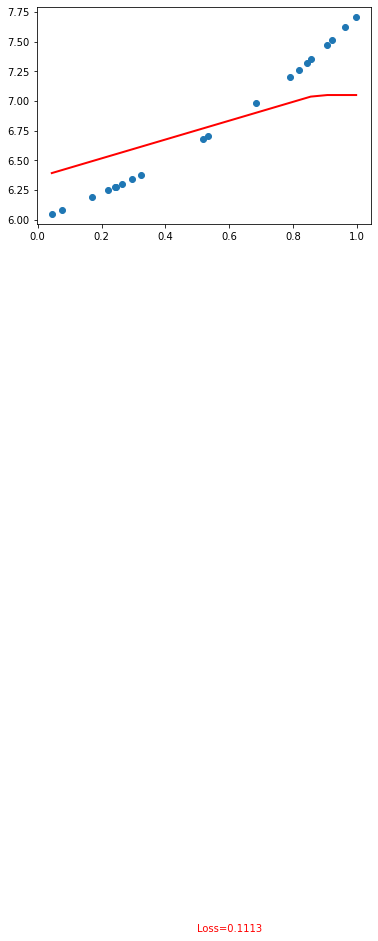

Epoch: 1/1... Step: 100... Loss: 0.116300... Val Loss: 0.078441


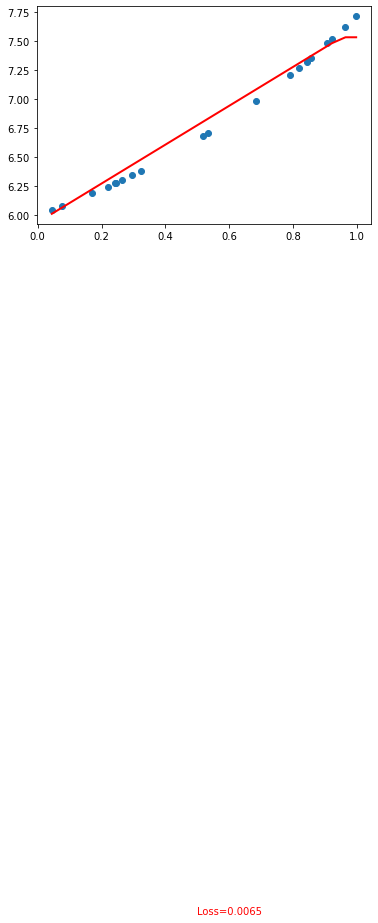

Epoch: 1/1... Step: 200... Loss: 0.009197... Val Loss: 0.007557


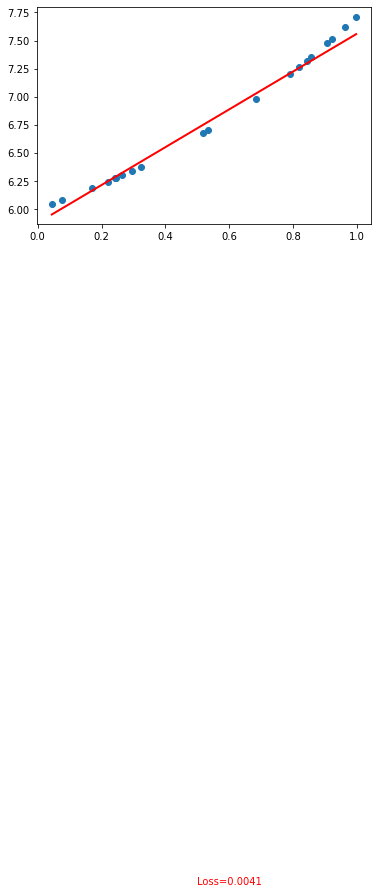

Epoch: 1/1... Step: 300... Loss: 0.005595... Val Loss: 0.003941


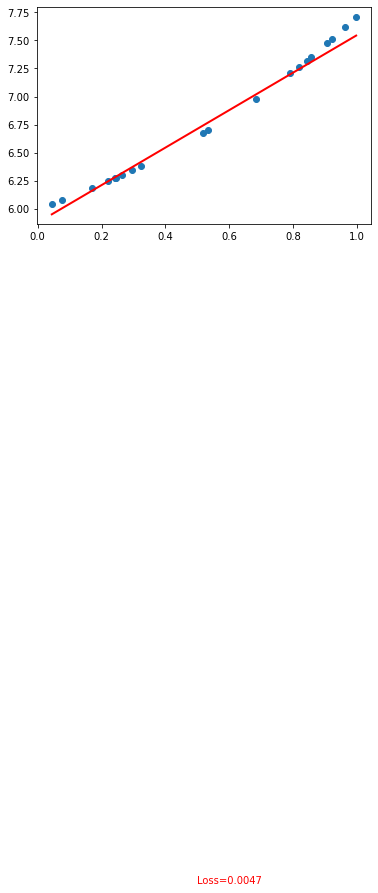

Epoch: 1/1... Step: 400... Loss: 0.004111... Val Loss: 0.003985


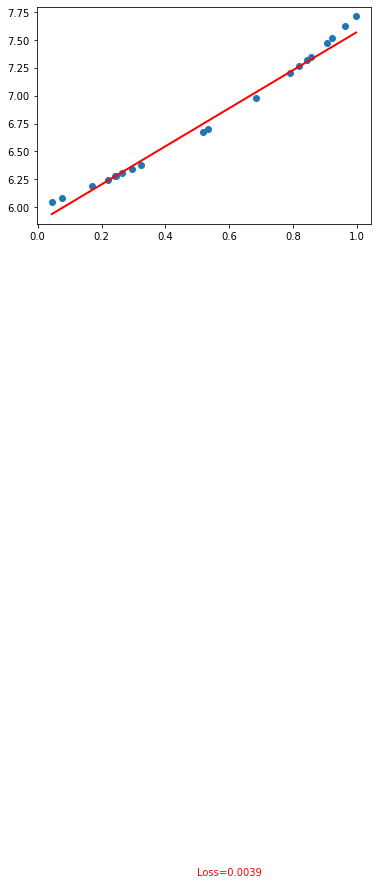

Epoch: 1/1... Step: 500... Loss: 0.006098... Val Loss: 0.003969


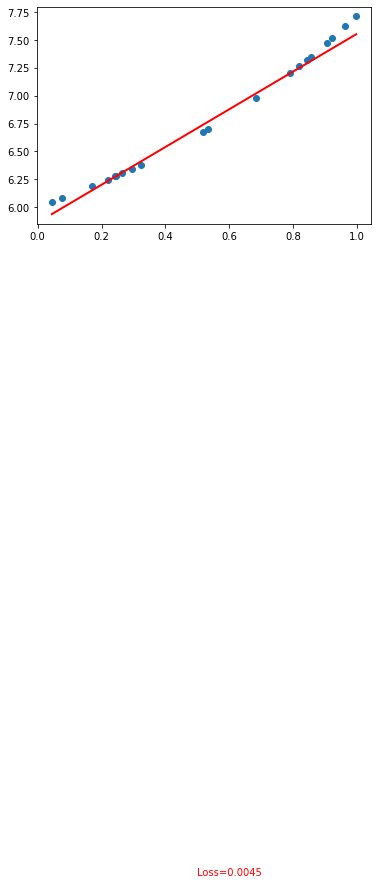

Epoch: 1/1... Step: 600... Loss: 0.004066... Val Loss: 0.004013


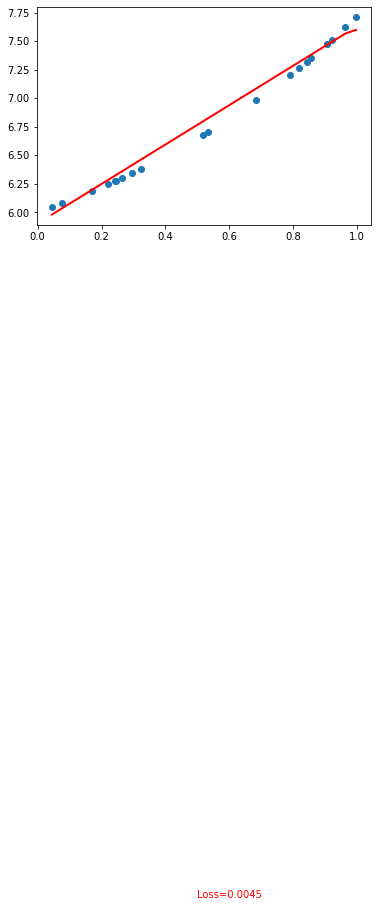

Epoch: 1/1... Step: 700... Loss: 0.006995... Val Loss: 0.006438


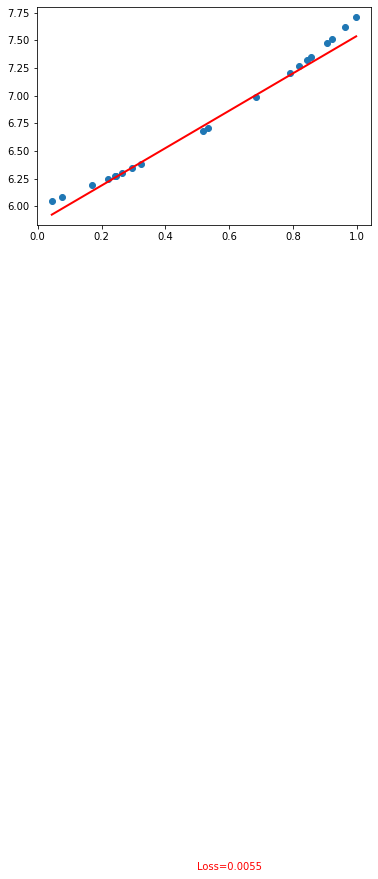

Epoch: 1/1... Step: 800... Loss: 0.003957... Val Loss: 0.004477


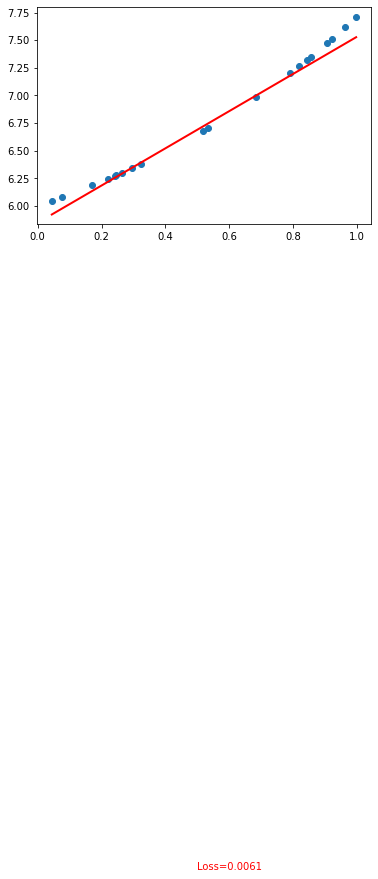

Epoch: 1/1... Step: 900... Loss: 0.004565... Val Loss: 0.004693


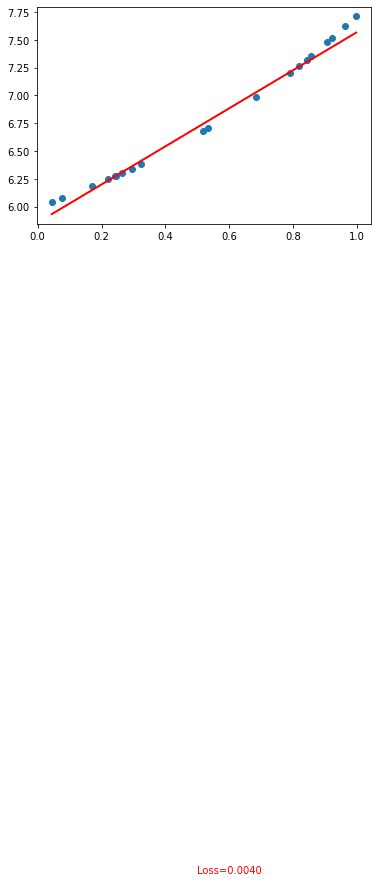

Epoch: 1/1... Step: 1000... Loss: 0.004565... Val Loss: 0.003998


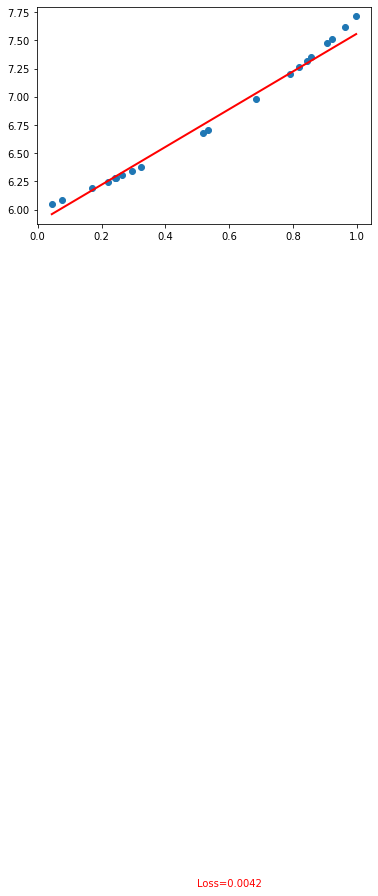

Epoch: 1/1... Step: 1100... Loss: 0.003885... Val Loss: 0.003965


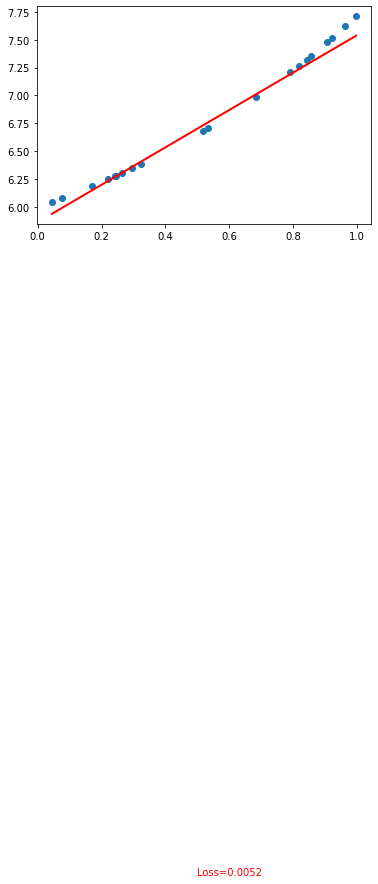

Epoch: 1/1... Step: 1200... Loss: 0.004022... Val Loss: 0.004228


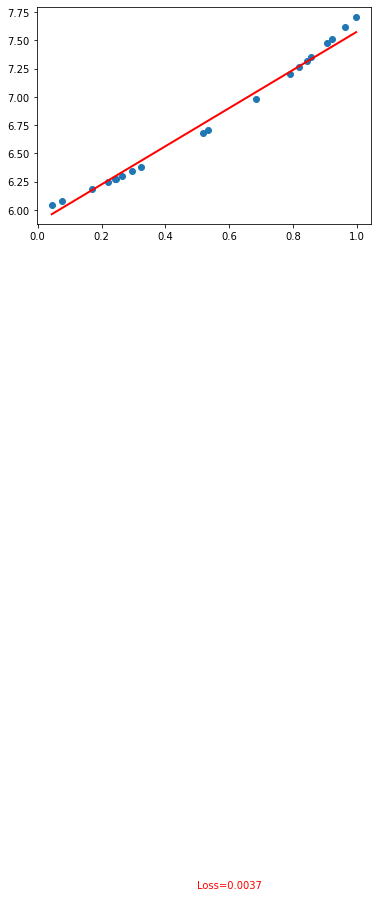

Epoch: 1/1... Step: 1300... Loss: 0.003376... Val Loss: 0.004151


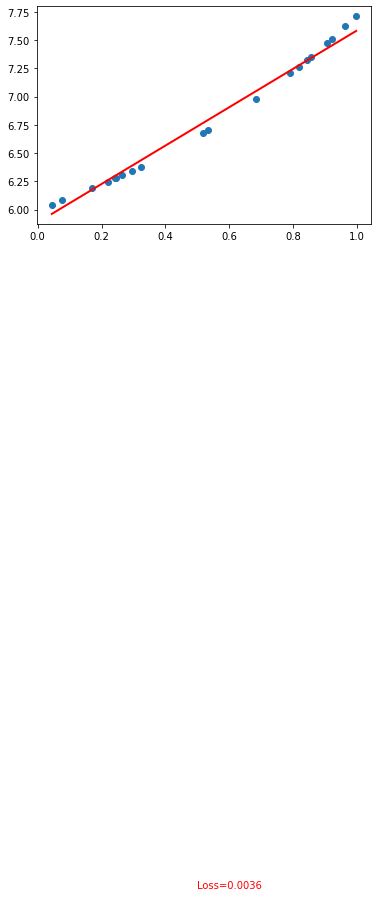

Epoch: 1/1... Step: 1400... Loss: 0.002798... Val Loss: 0.004266


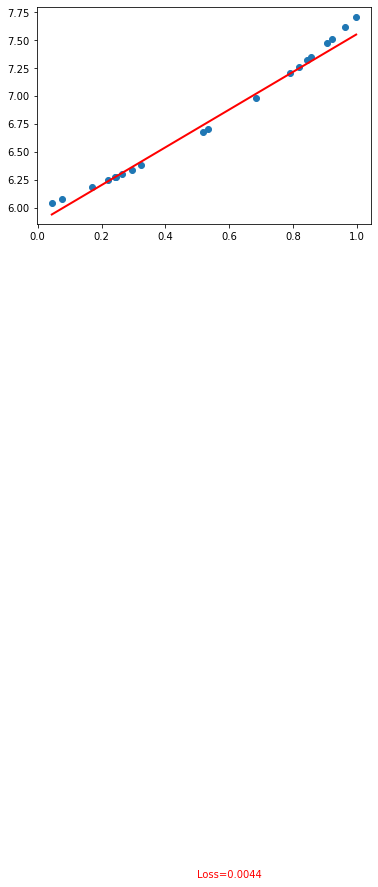

Epoch: 1/1... Step: 1500... Loss: 0.002521... Val Loss: 0.003977


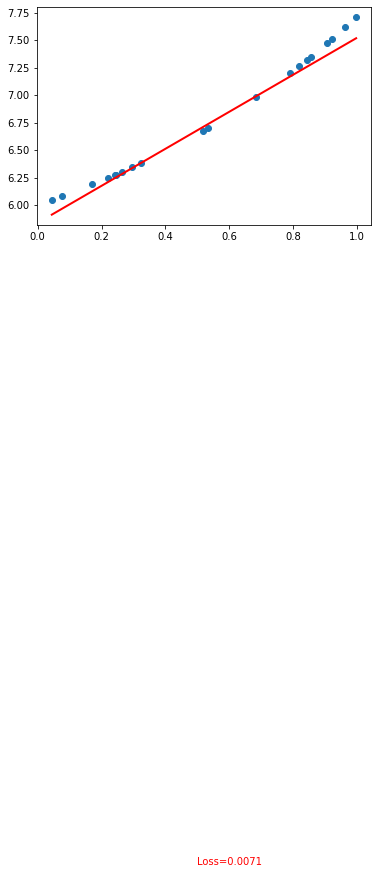

Epoch: 1/1... Step: 1600... Loss: 0.003574... Val Loss: 0.005347


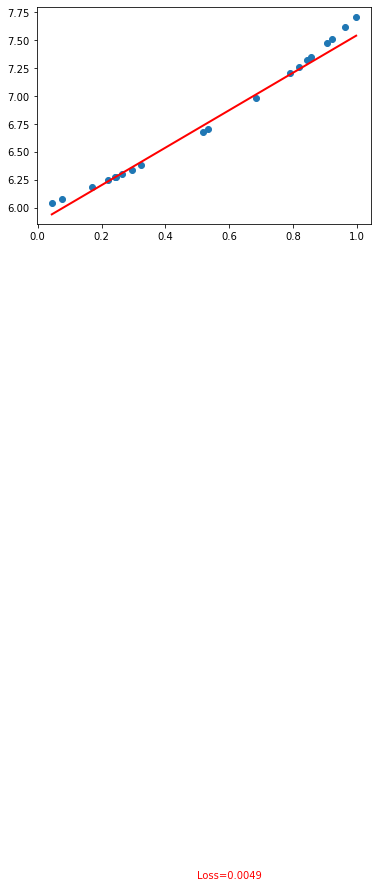

Epoch: 1/1... Step: 1700... Loss: 0.004601... Val Loss: 0.004058


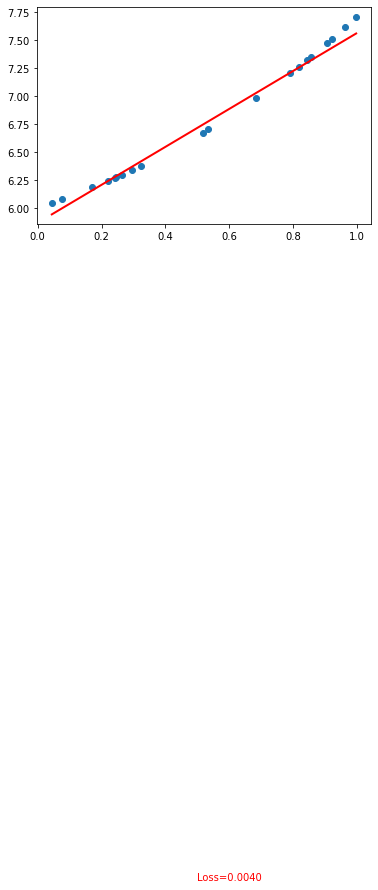

Epoch: 1/1... Step: 1800... Loss: 0.003324... Val Loss: 0.003932


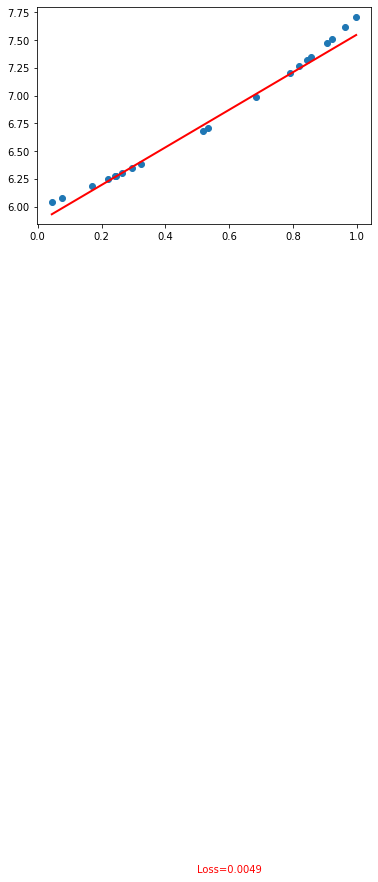

Epoch: 1/1... Step: 1900... Loss: 0.004571... Val Loss: 0.004166


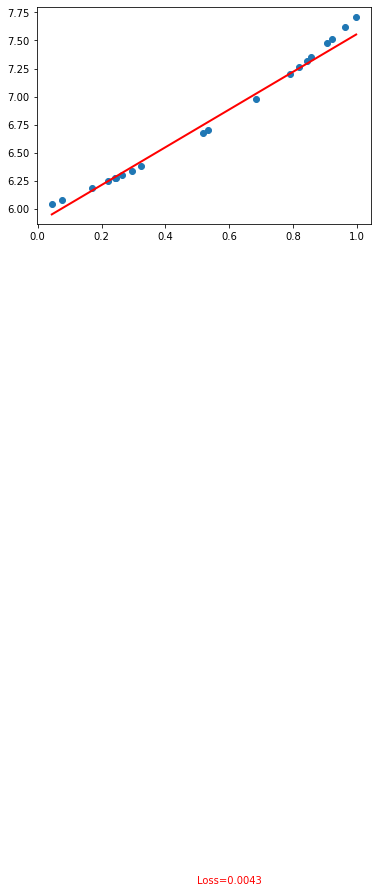

Epoch: 1/1... Step: 2000... Loss: 0.003279... Val Loss: 0.003936


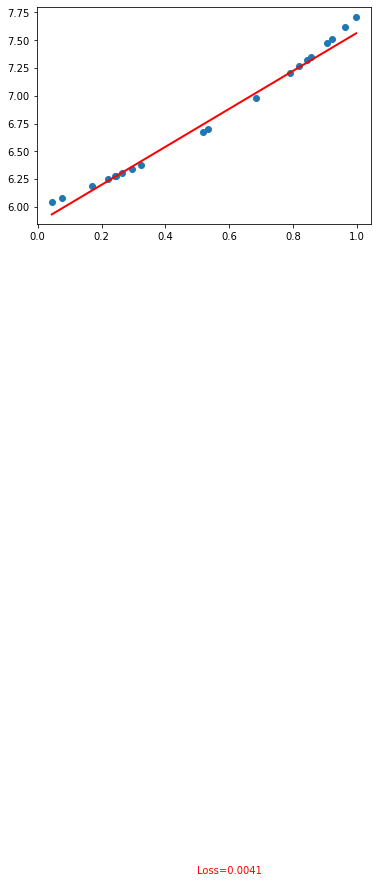

Epoch: 1/1... Step: 2100... Loss: 0.005730... Val Loss: 0.004008


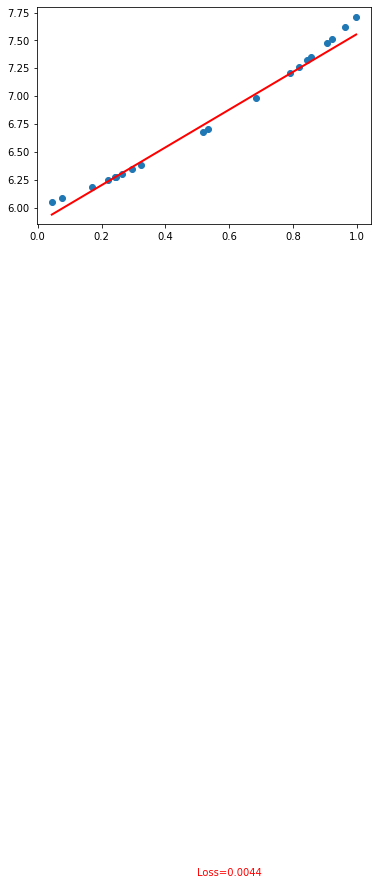

Epoch: 1/1... Step: 2200... Loss: 0.004538... Val Loss: 0.004008


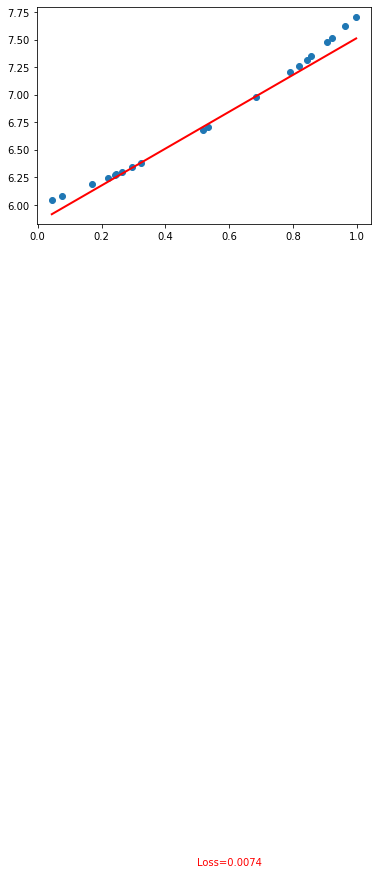

Epoch: 1/1... Step: 2300... Loss: 0.006694... Val Loss: 0.005437


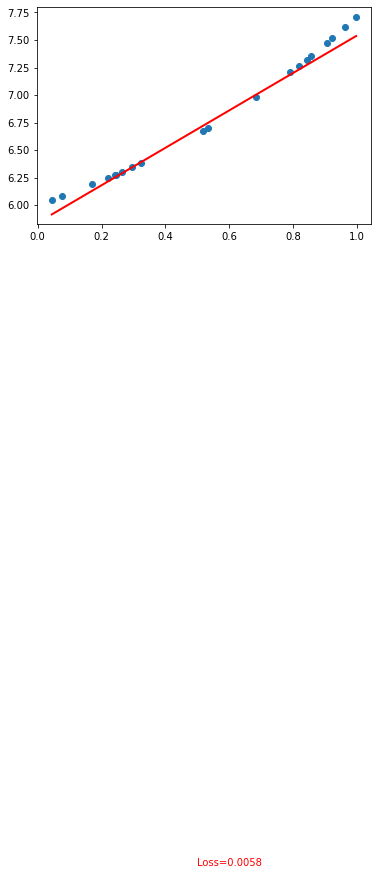

Epoch: 1/1... Step: 2400... Loss: 0.005315... Val Loss: 0.004698


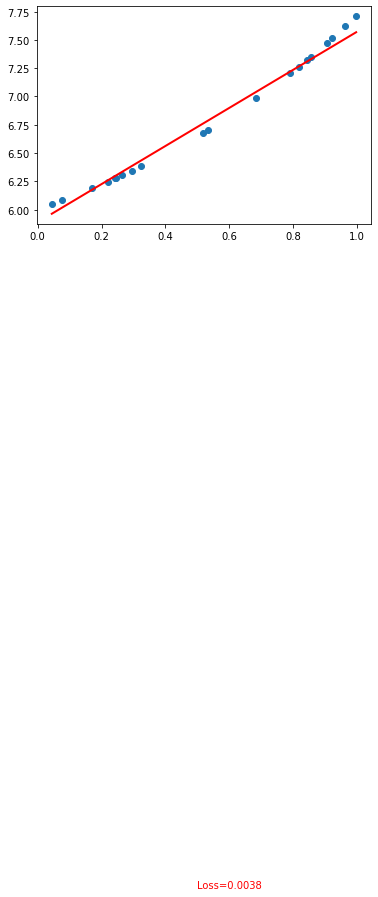

Epoch: 1/1... Step: 2500... Loss: 0.003929... Val Loss: 0.004078


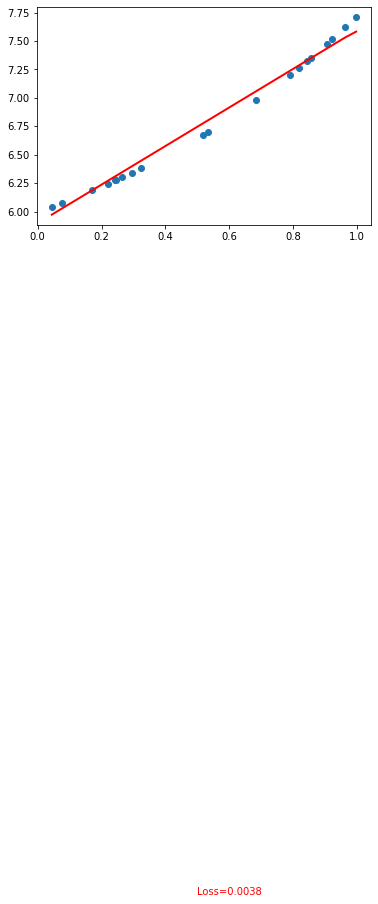

Epoch: 1/1... Step: 2600... Loss: 0.004147... Val Loss: 0.004763


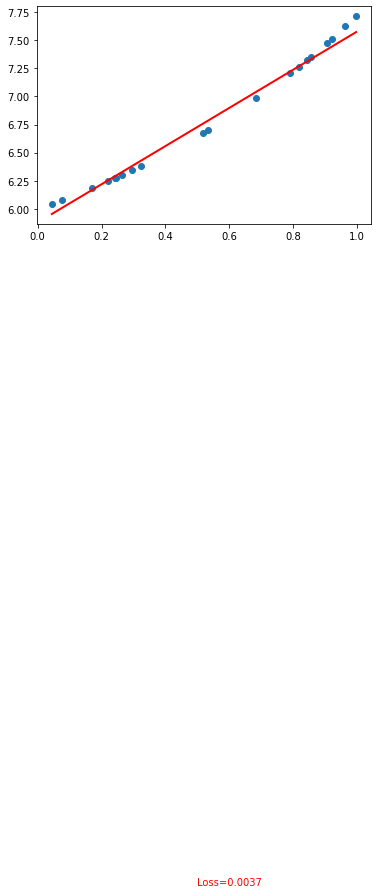

Epoch: 1/1... Step: 2700... Loss: 0.004333... Val Loss: 0.004037


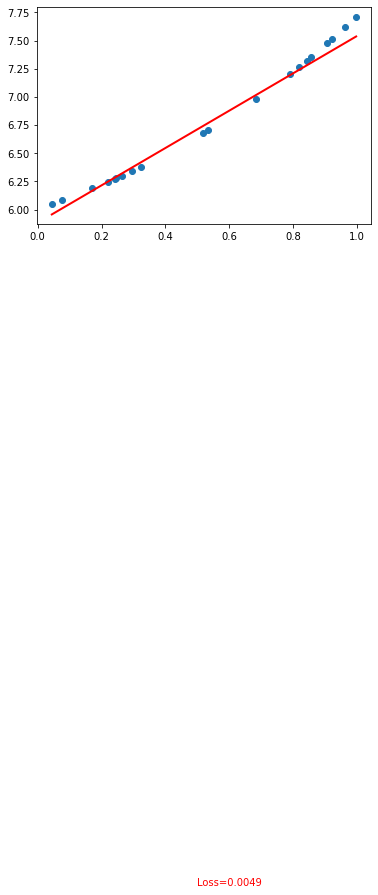

Epoch: 1/1... Step: 2800... Loss: 0.003047... Val Loss: 0.004043


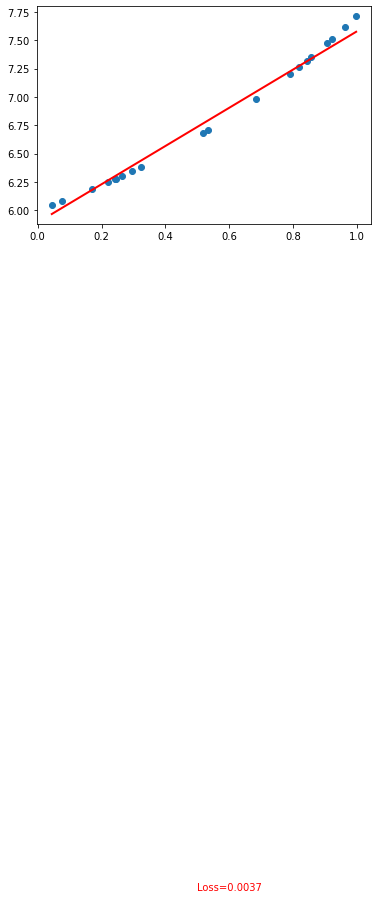

Epoch: 1/1... Step: 2900... Loss: 0.004742... Val Loss: 0.004224


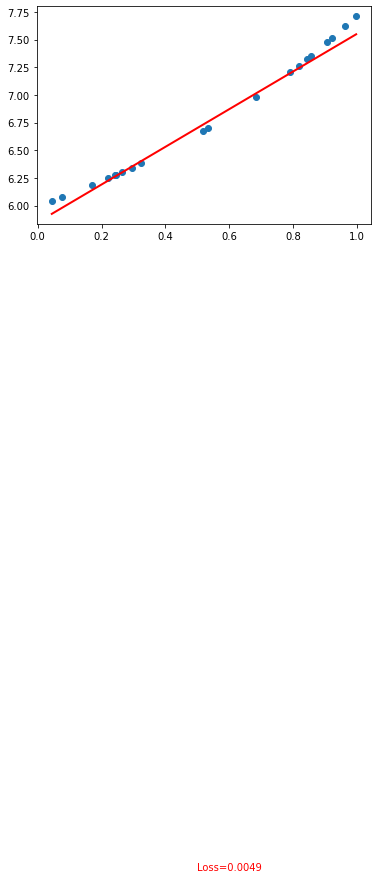

Epoch: 1/1... Step: 3000... Loss: 0.004349... Val Loss: 0.004234


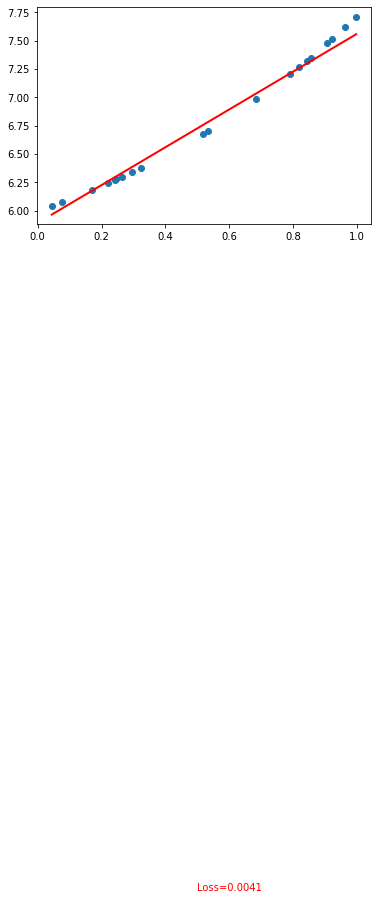

Epoch: 1/1... Step: 3100... Loss: 0.005756... Val Loss: 0.004047


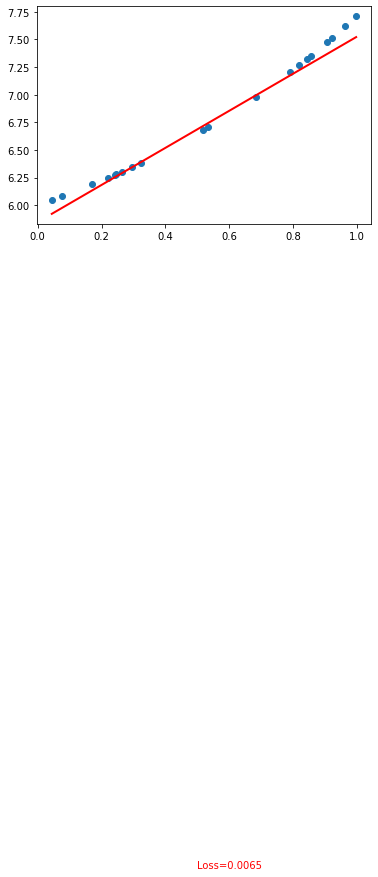

Epoch: 1/1... Step: 3200... Loss: 0.003438... Val Loss: 0.004936


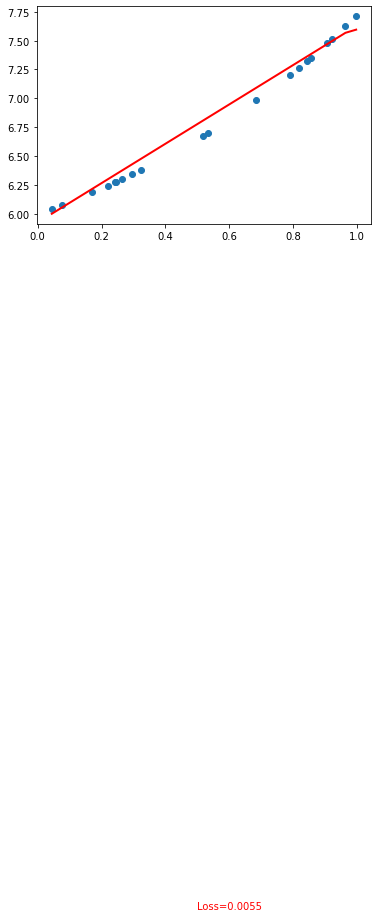

Epoch: 1/1... Step: 3300... Loss: 0.005088... Val Loss: 0.007621


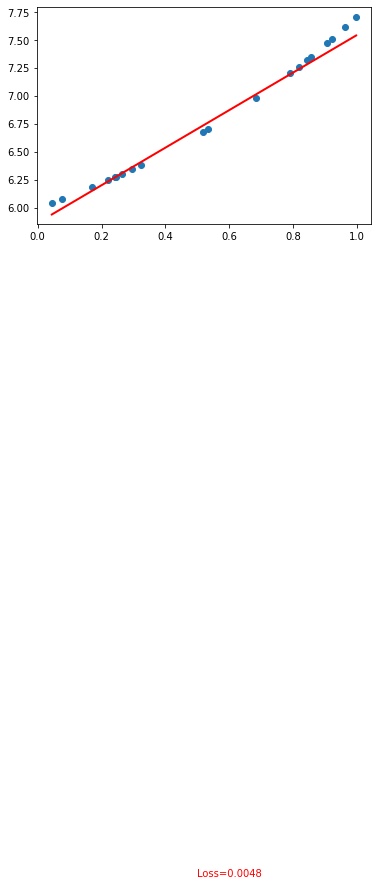

Epoch: 1/1... Step: 3400... Loss: 0.003306... Val Loss: 0.004071


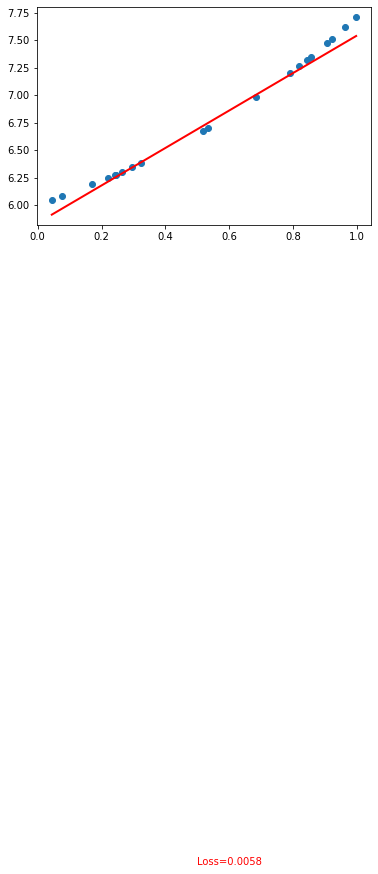

Epoch: 1/1... Step: 3500... Loss: 0.006051... Val Loss: 0.004733


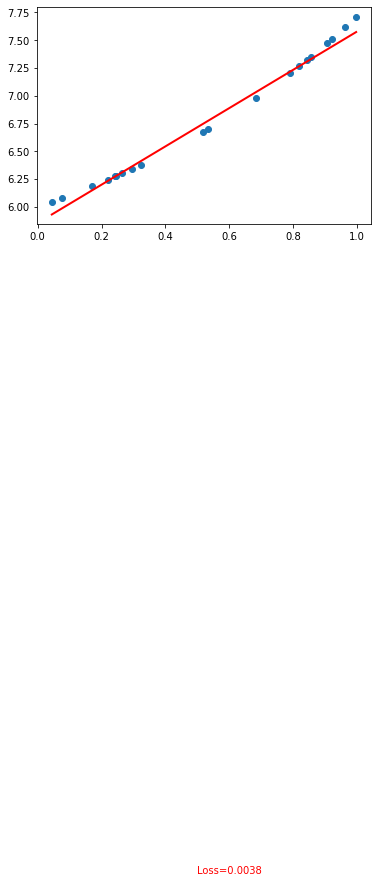

Epoch: 1/1... Step: 3600... Loss: 0.005081... Val Loss: 0.004027


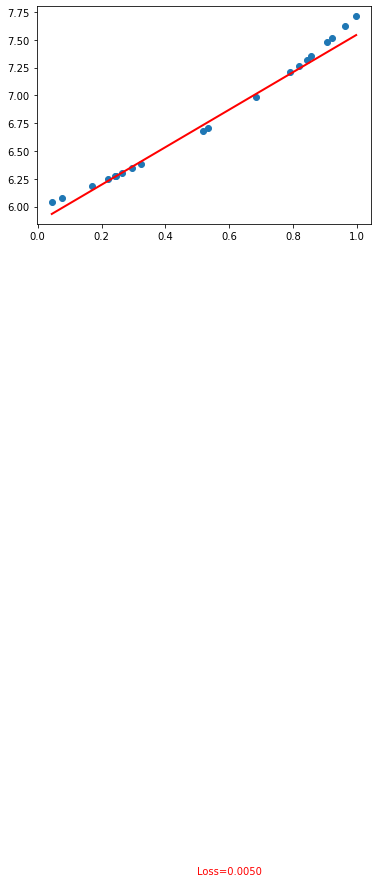

Epoch: 1/1... Step: 3700... Loss: 0.002962... Val Loss: 0.004166


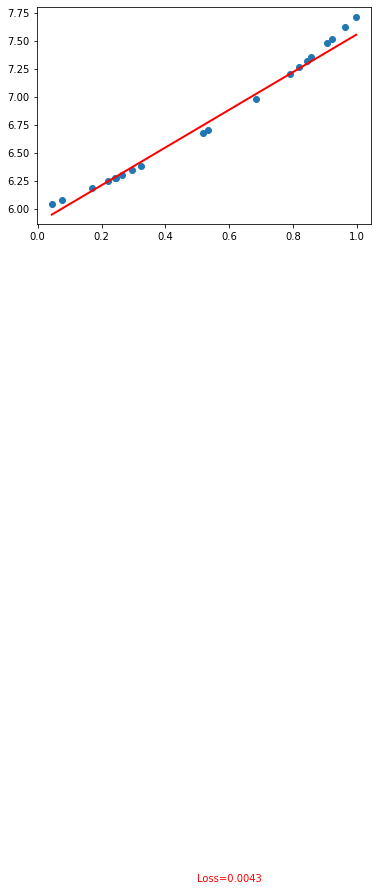

Epoch: 1/1... Step: 3800... Loss: 0.005278... Val Loss: 0.003939


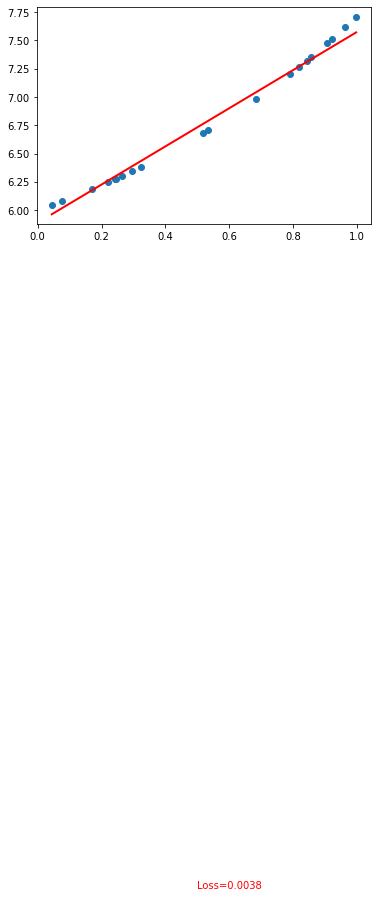

Epoch: 1/1... Step: 3900... Loss: 0.004673... Val Loss: 0.004129


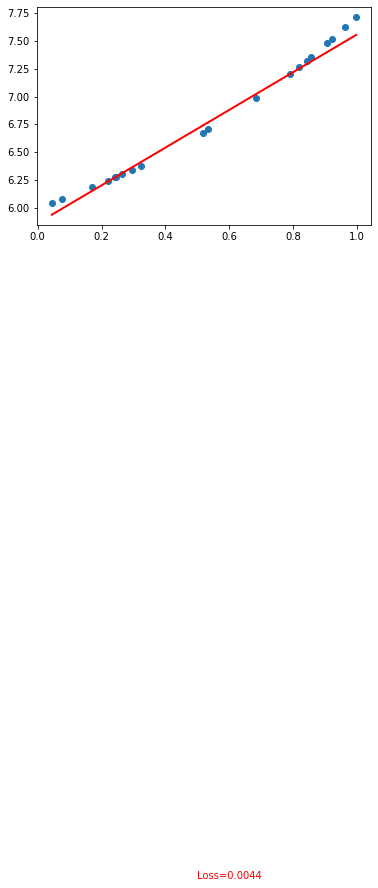

Epoch: 1/1... Step: 4000... Loss: 0.002965... Val Loss: 0.003972


In [33]:
for e in range(epochs):
    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        # if training on gpu
        inputs, labels = inputs.to(device), labels.to(device)

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        # x.size() -> [batch_size]
        batch_size = inputs.size(0)
        # IMPORTANT - change the dimensions of x before it enters the NN, batch size must always be first
        x = inputs.unsqueeze(0)  # x.size() -> [1, batch_size]
        x = x.view(batch_size, -1)  # x.size() -> [batch_size, 1]
        predictions = net(x)

        # calculate the loss and perform backprop
        loss = loss_func(predictions.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_losses = []
            net.eval()
            print_flag = True
            for inputs, labels in valid_loader:
                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                if print_flag:
                    inputs, labels = zip(*sorted(zip(inputs.numpy(), labels.numpy())))
                    inputs = torch.from_numpy(np.asarray(inputs))
                    labels = torch.from_numpy(np.asarray(labels))
                inputs, labels = inputs.to(device), labels.to(device)

                # get the output from the model
                # x.size() -> [batch_size]
                batch_size = inputs.size(0)
                # IMPORTANT - change the dimensions of x before it enters the NN, batch size must always be first
                x = inputs.unsqueeze(0)  # x.size() -> [1, batch_size]
                x = x.view(batch_size, -1)  # x.size() -> [batch_size, 1]
                val_predictions = net(x)
                val_loss = loss_func(val_predictions.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                if print_flag:
                    print_flag = False
                    # plot and show learning process
                    fig = plt.figure()
                    ax = fig.add_subplot(111)
                    ax.cla()
                    ax.scatter(inputs.cpu().data.numpy(), labels.cpu().data.numpy())
                    ax.plot(
                        inputs.cpu().data.numpy(),
                        val_predictions.cpu().data.numpy(),
                        "r-",
                        lw=2,
                    )
                    ax.text(
                        0.5,
                        0,
                        "Loss=%.4f" % np.mean(val_losses),
                        fontdict={"size": 10, "color": "red"},
                    )
                    plt.pause(0.1)
                    ax.clear()

            net.train()
            print(
                "Epoch: {}/{}...".format(e + 1, epochs),
                "Step: {}...".format(counter),
                "Loss: {:.6f}...".format(loss.item()),
                "Val Loss: {:.6f}".format(np.mean(val_losses)),
            )
plt.show()

### Part 3 - More About AUTOGRAD: Automatic Differentiation

As you have seen in the regression model above, tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

During our training we have used AUTOGRAD methods to update our Neural Net. Lets discuss about that in more details.

***torch.Tensor*** is the central class of the package. If you set its attribute ***.requires_grad*** as True, it starts to track all operations on it. When you finish your computation you can call ***.backward()*** and have all the gradients computed automatically. The gradient for this tensor will be accumulated into .grad attribute.

To stop a tensor from tracking history, you can call ***.detach()*** to detach it from the computation history, and to prevent future computation from being tracked.

In [34]:
import torch

# Notice the 'requires_grad'
x = torch.ones(2, 2, requires_grad=True)
print(x)

y = x + 2
print(y)

print(y.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [50]:
# Notice how the tensors follow mathamtical operations
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


More on require grad

In [42]:
a = torch.randn(3, 2)
a = (a * 3) - (a - 1)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### Lets see how easy it is to calculate the gradients:

In [43]:
b.backward()
# print gradients d(out)/dx
print(a.grad)

tensor([[6.7039, 1.5181],
        [7.7425, 4.5074],
        [0.2903, 1.3825]])


## A bit more on pytorch datasets

A custom Dataset class must implement three functions: \_\_init__, \_\_len__, and \_\_getitem__.

In [51]:
import pandas as pd
import torch
from torch.utils.data import Dataset

In [52]:
class ClassificationDataset(Dataset):
    def __init__(self, file_path):
        # Read data
        self.file_path = file_path
        data = pd.read_csv(self.file_path)

        # Split to sentences and labels
        self.sentences = data["reviewText"].tolist()
        self.labels = data["label"].tolist()

    def __getitem__(self, item):
        cur_sen = self.sentences[item]
        label = self.labels[item]
        data = {"sentences": cur_sen, "labels": label}
        return data

    def __len__(self):
        return len(self.sentences)

In [53]:
dataset = ClassificationDataset("./amazon_sa/train.csv")

In [59]:
dataloader = DataLoader(dataset, batch_size=10)

In [67]:
len(next(iter(dataloader))['sentences'])

10

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Much of the code above is adjusted from  <a href="https://github.com/udacity">Udacity tutorials</a>
* By <a href="https://github.com/eyalbd2">Eyal Ben David</a> and <a href="https://github.com/nadavo">Nadav Oved </a>